<center>
    <h3>
        ETL
    <h3/>
<center/>

In [625]:
# importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<center>
    <h4>
        Leer Datos
    <h4/>
<center/>

In [626]:
# Leer datos desde csv en dataframe de pandas
encoding = "utf8"
canalDeVenta = pd.read_csv("..\datos\CanalDeVenta.csv", sep=",", encoding=encoding)
clientes = pd.read_csv("..\datos\Clientes.csv", sep=";", encoding=encoding, usecols=['ID','Provincia', 'Nombre_y_Apellido', 'Domicilio', 'Telefono'])
compra = pd.read_csv("..\datos\Compra.csv", sep=",", encoding=encoding)
empleados = pd.read_csv("..\datos\Empleados.csv", sep=",", encoding=encoding)
gasto = pd.read_csv("..\datos\Gasto.csv", sep=",", encoding=encoding)
productos = pd.read_csv("..\datos\Productos.csv", sep=",", encoding=encoding)
proveedores = pd.read_csv("..\datos\Proveedores.csv", sep=",", encoding=encoding)
sucursales = pd.read_csv("..\datos\Sucursales.csv", sep=";",encoding=encoding, usecols=['ID','Sucursal','Direccion','Localidad','Provincia'])
tipoDeGasto = pd.read_csv("..\datos\TiposDeGasto.csv", sep=",", encoding=encoding)
venta = pd.read_csv("..\datos\Venta.csv", sep=",", encoding=encoding)

<center>
    <h4>
        Analizar Datos
    <h4/>
<center/>


Canal De Ventas

In [627]:
canalDeVenta.head()

,CODIGO,DESCRIPCION
0,1,Telefónica
1,2,OnLine
2,3,Presencial


In [628]:
canalDeVenta['DESCRIPCION'] = canalDeVenta['DESCRIPCION'].astype(str)
canalDeVenta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODIGO       3 non-null      int64 
 1   DESCRIPCION  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


* La tabla canalDeVenta no contiene valores nulos

#### Clientes

In [629]:
# cambiar el tipo de dato a str de la columna telefono y eliminar el separador
clientes['Telefono'] = clientes['Telefono'].astype(str).str.replace('-','')
clientes.head()

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,425161
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,497578
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,493435
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",492883
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,4914608


In [630]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 3407 non-null   int64 
 1   Provincia          3376 non-null   object
 2   Nombre_y_Apellido  3361 non-null   object
 3   Domicilio          3359 non-null   object
 4   Telefono           3407 non-null   object
dtypes: int64(1), object(4)
memory usage: 133.2+ KB


In [631]:
# Verificar y contar los campos nulos
clientes_nulos = clientes.isnull().sum()
print(clientes_nulos)

ID                    0
Provincia            31
Nombre_y_Apellido    46
Domicilio            48
Telefono              0
dtype: int64


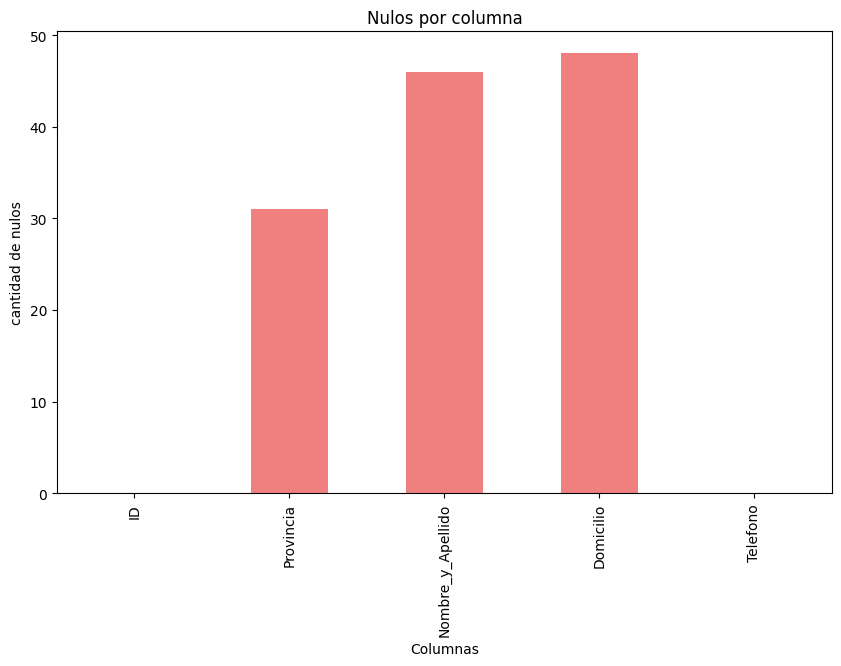

In [632]:
# graficar nulos agrupados por columna

nulos_columna = clientes.isnull().sum()
plt.figure(figsize=(10, 6))
nulos_columna.plot(kind='bar', color='lightcoral')
plt.title('Nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('cantidad de nulos')
plt.xticks(rotation=90)
plt.show()

In [633]:
# reemplazar los nulos
clientes = clientes.fillna('SinDato')
# despues de la limpieza revisar si existen campos nulos
clientes_nulos = clientes.isnull().sum()
print(clientes_nulos)

ID                   0
Provincia            0
Nombre_y_Apellido    0
Domicilio            0
Telefono             0
dtype: int64


* Los valores nulos dentro de la tabla clientes se reeplazaron por la sentencia 'SinDato'

#### Compra

In [634]:
compra['Fecha'] = pd.to_datetime(compra['Fecha'], format='%Y-%m-%d')
compra.head()

,IdCompra,Fecha,IdProducto,Cantidad,Precio,IdProveedor
0,1,2015-01-30,42832,13,560.51,12
1,2,2015-01-30,42833,11,497.58,7
2,3,2015-01-30,42834,1,588.50,6
3,4,2015-01-30,42835,9,567.66,14
4,5,2015-01-30,42839,14,231.31,2


In [635]:
compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   IdCompra     11539 non-null  int64         
 1   Fecha        11539 non-null  datetime64[ns]
 2   IdProducto   11539 non-null  int64         
 3   Cantidad     11539 non-null  int64         
 4   Precio       11539 non-null  float64       
 5   IdProveedor  11539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 541.0 KB


In [636]:
compra_nulos = compra.isnull().sum()
print(compra_nulos)

IdCompra       0
Fecha          0
IdProducto     0
Cantidad       0
Precio         0
IdProveedor    0
dtype: int64


* La tabla compra no contiene valores nulos

#### Empleados

In [637]:
empleados.head()

,ID_empleado,Apellido,Nombre,Sucursal,Sector,Cargo,Salario
0,1968,Burgos,Jeronimo,Caseros,Administración,Administrativo,32000
1,1674,Villegas,Estefania,Caseros,Administración,Vendedor,32000
2,1516,Fernandez,Guillermo,Caseros,Administración,Vendedor,45000
3,1330,Ramirez,Eliana,Caseros,Administración,Vendedor,32000
4,1657,Carmona,Jose,Caseros,Administración,Vendedor,32000


In [638]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_empleado  267 non-null    int64 
 1   Apellido     267 non-null    object
 2   Nombre       267 non-null    object
 3   Sucursal     267 non-null    object
 4   Sector       267 non-null    object
 5   Cargo        267 non-null    object
 6   Salario      267 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 14.7+ KB


In [639]:
empleados_nulos = empleados.isnull().sum()
print(empleados_nulos)

ID_empleado    0
Apellido       0
Nombre         0
Sucursal       0
Sector         0
Cargo          0
Salario        0
dtype: int64


* La tabla empleados no contiene valores nulos

#### Gasto

In [640]:
# cambiar tipo de dato de la columna fecha
gasto['Fecha'] = pd.to_datetime(gasto['Fecha'], format='%Y-%m-%d')
gasto.head()

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.90
1,2,18,2,2015-01-01,317.02
2,3,18,3,2015-01-01,118.89
3,4,18,4,2015-01-01,1174.23
4,5,1,1,2015-01-01,1104.51


In [641]:
gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   IdGasto      8640 non-null   int64         
 1   IdSucursal   8640 non-null   int64         
 2   IdTipoGasto  8640 non-null   int64         
 3   Fecha        8640 non-null   datetime64[ns]
 4   Monto        8640 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 337.6 KB


In [642]:
gasto_nulos = gasto.isnull().sum()
print(gasto_nulos)

IdGasto        0
IdSucursal     0
IdTipoGasto    0
Fecha          0
Monto          0
dtype: int64


* La tabla gasto no contiene valores nulos

#### Productos

In [643]:
productos.head()

,ID_PRODUCTO,Concepto,Tipo,Precio
0,42737,EPSON COPYFAX 2000,IMPRESIÓN,1658.00
1,42754,MOT ASROCK H110M-HDS S1151 S/VGA,INFORMATICA,1237.50
2,42755,MOT ASROCK A58M-VG3+ AMD FM2+ R2.0,INFORMATICA,1079.32
3,42756,MOT ECS KAM1-I AM1,INFORMATICA,638.66
4,42757,MOT ASROCK B150M-HDS S1151 S/VGA,INFORMATICA,1784.42


In [644]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_PRODUCTO  291 non-null    int64  
 1   Concepto     291 non-null    object 
 2   Tipo         279 non-null    object 
 3   Precio       291 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.2+ KB


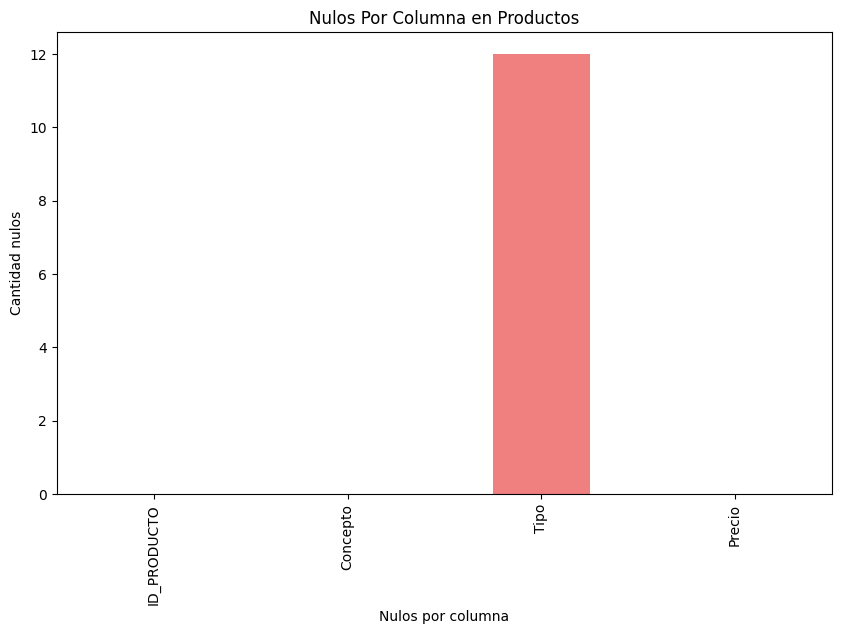

In [645]:
# graficar nulos de la tabla

plt.figure(figsize=(10, 6))
productos_nulos_por_columna = productos.isnull().sum()
productos_nulos_por_columna.plot(kind='bar', color='lightcoral')
plt.title('Nulos Por Columna en Productos')
plt.xlabel('Nulos por columna')
plt.ylabel('Cantidad nulos')
plt.xticks(rotation=90)
plt.show()

In [646]:
# verifiar si hau nulos
productos_nulos = productos.isnull().sum()
# reemplazar nulos por la sentencia SinDato
productos = productos.fillna('SinDato')
print(productos_nulos)

ID_PRODUCTO     0
Concepto        0
Tipo           12
Precio          0
dtype: int64


#### Proveedores

In [647]:
proveedores.head()

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
1,2,San Cirano,ALBERTI 965,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA,BRANDSEN
2,3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
3,4,Rivero Insumos,PTE. PERON 3872,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA,LANUS
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA


In [648]:
# Reemplazar los nombres
proveedores.columns = ['IdProveedor','Nombre','Direccion','Ciudad','Provincia','Pais','Localidad']
# Reordenar las columnas
proveedores = proveedores[['IdProveedor','Nombre','Direccion','Localidad','Ciudad','Provincia','Pais']]
proveedores.head()

,IdProveedor,Nombre,Direccion,Localidad,Ciudad,Provincia,Pais
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,AVELLANEDA,BUENOS AIRES,ARGENTINA
1,2,San Cirano,ALBERTI 965,BRANDSEN,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA
2,3,Bell S.A.,MORENO 331,CAMPANA,CAMPANA,BUENOS AIRES,ARGENTINA
3,4,Rivero Insumos,PTE. PERON 3872,LANUS,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,LAPRIDA,BUENOS AIRES,ARGENTINA


In [649]:
proveedores_nulos = proveedores.isnull().sum()
print(proveedores_nulos)

IdProveedor    0
Nombre         2
Direccion      0
Localidad      0
Ciudad         0
Provincia      0
Pais           0
dtype: int64


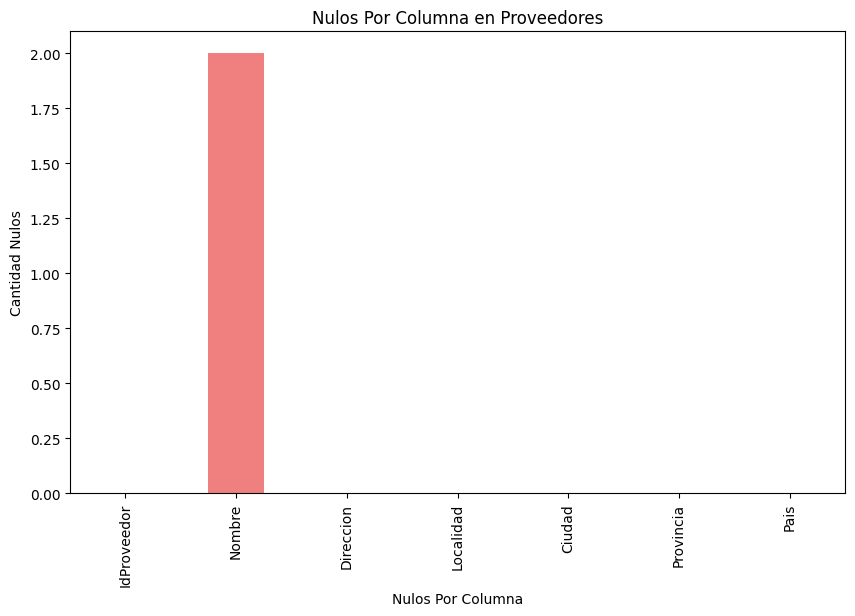

In [650]:
# Graficar nulos por columnas
plt.figure(figsize=(10, 6))
plt.title('Nulos Por Columna en Proveedores')
nulosPorColumnaProveedores = proveedores.isnull().sum()
nulosPorColumnaProveedores.plot(kind='bar', color='lightcoral')
plt.xlabel('Nulos Por Columna')
plt.ylabel('Cantidad Nulos')
plt.xticks(rotation=90)
plt.show()

In [651]:
# verifiar nulos
proveedores_nulos = proveedores.isnull().sum()
# reemplazar nulos por la sentencia SinDato
proveedores = proveedores.fillna('SinDato')
proveedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IdProveedor  14 non-null     int64 
 1   Nombre       14 non-null     object
 2   Direccion    14 non-null     object
 3   Localidad    14 non-null     object
 4   Ciudad       14 non-null     object
 5   Provincia    14 non-null     object
 6   Pais         14 non-null     object
dtypes: int64(1), object(6)
memory usage: 916.0+ bytes


#### Sucursales

In [652]:
sucursales.head()

,ID,Sucursal,Direccion,Localidad,Provincia
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires
1,2,Palermo 1,Guatemala 5701,CABA,CABA
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As
4,5,Almagro,Venezuela 3650,Capital,Bs.As.


In [653]:
sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31 non-null     int64 
 1   Sucursal   31 non-null     object
 2   Direccion  31 non-null     object
 3   Localidad  31 non-null     object
 4   Provincia  31 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.3+ KB


In [654]:
sucursales_nulos = sucursales.isnull().sum()
print(sucursales_nulos)

ID           0
Sucursal     0
Direccion    0
Localidad    0
Provincia    0
dtype: int64


* La tabla sucursales no tiene valores nulos

#### Tipo De Gasto

In [655]:
tipoDeGasto.head()

,IdTipoGasto,Descripcion,Monto_Aproximado
0,1,Alquiler,1000
1,2,Servicios,300
2,3,Impuestos,100
3,4,Sueldos y Jornales,1000


In [656]:
tipoDeGasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IdTipoGasto       4 non-null      int64 
 1   Descripcion       4 non-null      object
 2   Monto_Aproximado  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [657]:
tipoDeGasto_nulos = tipoDeGasto.isnull().sum()
print(tipoDeGasto_nulos)

IdTipoGasto         0
Descripcion         0
Monto_Aproximado    0
dtype: int64


* La tabla tipoDeGasto no contiene valores nulos

#### Venta

In [658]:
venta.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [659]:
# Cambiar tipo de datos de columnas fecha
venta['Fecha'] = pd.to_datetime(venta['Fecha'], format='%Y-%m-%d')
venta['Fecha_Entrega'] = pd.to_datetime(venta['Fecha_Entrega'], format='%Y-%m-%d')

In [660]:
venta_nulos = venta.isnull().sum()
print(venta_nulos)

IdVenta            0
Fecha              0
Fecha_Entrega      0
IdCanal            0
IdCliente          0
IdSucursal         0
IdEmpleado         0
IdProducto         0
Precio           924
Cantidad         892
dtype: int64


* Al crear un nuevo dataframe con los registros con nulos en 'Precio' y 'Cantidad' se puede comparar luego con el stock y descartar finalmente si son ventas reales o no

In [661]:
# Filtrar las filas con registros nulos
filas_con_nulos = venta[venta.isnull().any(axis=1)]

# Verificar el nuevo DataFrame
filas_con_nulos.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
71,72,2018-08-22,2018-09-01,1,1185,13,1674,42779,9555.04,NaN
85,86,2015-03-17,2015-03-20,3,3159,13,1674,42839,NaN,2.0
104,105,2017-10-28,2017-11-02,3,1107,13,1674,42822,816.86,NaN
113,114,2018-10-08,2018-10-13,3,1868,13,1674,42820,NaN,3.0
153,154,2019-01-17,2019-01-21,3,1416,13,1674,42927,91.00,NaN


In [665]:
# Exportar a csv los registros para determinar si son validos o no
filas_con_nulos.to_csv('filas_con_nulos.csv', index='False')

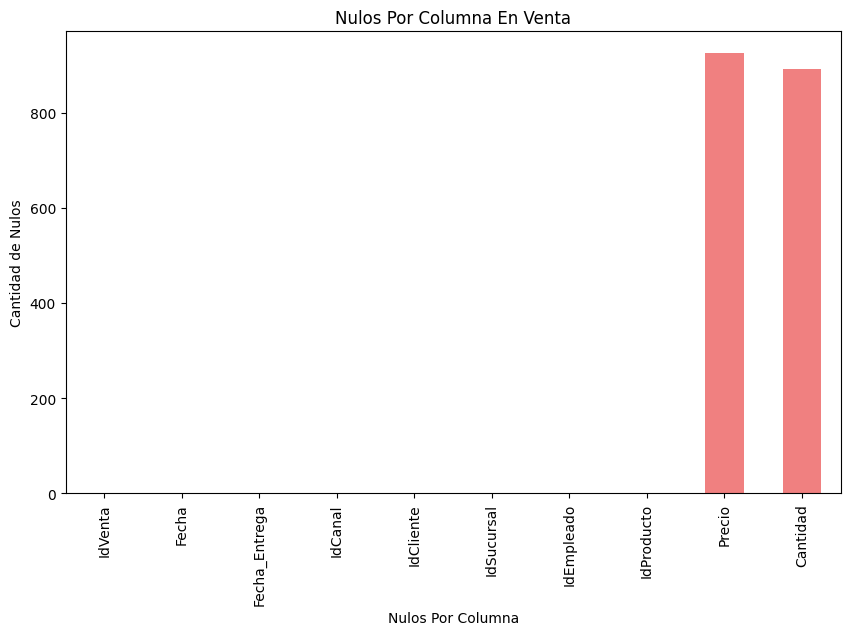

In [666]:
# Graficar nulos en la tabla ventas

plt.figure(figsize=(10, 6))
ventas_nulos = venta.isnull().sum()
ventas_nulos.plot(kind='bar', color='lightcoral')
plt.title('Nulos Por Columna En Venta')
plt.xlabel('Nulos Por Columna')
plt.ylabel('Cantidad de Nulos')
plt.xticks(rotation=90)
plt.show()

En la columna Cantidad reemplazo el tipo de dato de float a integer ya que no puede venderse la mitad de un producto debe ser entero el tipo de dato, primero elimino los datos nulos

In [667]:
# Elimino los valores nulos de ventas que no tienen la cantidad especificada y precio en la tabla
venta = venta.dropna(subset=['Cantidad'])
venta = venta.dropna(subset=['Precio'])

In [671]:
# verifico nulos
venta_nulos = venta.isnull().sum()
print(venta_nulos)

IdVenta          0
Fecha            0
Fecha_Entrega    0
IdCanal          0
IdCliente        0
IdSucursal       0
IdEmpleado       0
IdProducto       0
Precio           0
Cantidad         0
dtype: int64


In [670]:
# Cambio tripo de dato
venta['Cantidad'] = venta['Cantidad'].astype('int64')
venta.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3


In [672]:
venta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44845 entries, 0 to 46644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdVenta        44845 non-null  int64         
 1   Fecha          44845 non-null  datetime64[ns]
 2   Fecha_Entrega  44845 non-null  datetime64[ns]
 3   IdCanal        44845 non-null  int64         
 4   IdCliente      44845 non-null  int64         
 5   IdSucursal     44845 non-null  int64         
 6   IdEmpleado     44845 non-null  int64         
 7   IdProducto     44845 non-null  int64         
 8   Precio         44845 non-null  float64       
 9   Cantidad       44845 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7)
memory usage: 3.8 MB


* Se resolvio la cantidad de valores nulos no obstante los valores nulos deben compararse con el stock ya que puede ser una venta real que no especificaron todos los datos. 